In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from tensorboardX import SummaryWriter
import torchvision.models as models
import torchvision.utils as vutils
from torchvision import datasets
%matplotlib inline

In [2]:
SummaryWriter?

Init signature: SummaryWriter(log_dir=None, comment='')
Docstring:     
Writes `Summary` directly to event files.
The `SummaryWriter` class provides a high-level api to create an event file in a
given directory and add summaries and events to it. The class updates the
file contents asynchronously. This allows a training program to call methods
to add data to the file directly from the training loop, without slowing down
training.
Init docstring:
Args:
    log_dir (string): save location, default is: runs/**CURRENT_DATETIME_HOSTNAME**, which changes after each
      run. Use hierarchical folder structure to compare between runs easily. e.g. 'runs/exp1', 'runs/exp2'
    comment (string): comment that appends to the default log_dir
File:           c:\program files (x86)\python\anaconda\envs\py36\lib\site-packages\tensorboardx\writer.py
Type:           type


## Create Graphs in Tensorboard

## Create some toy data with 3 classes which are not linearly separable

In [3]:
r = np.tile(np.r_[0:1:100j],3)

t = np.r_[0:np.pi*4:300j] + np.random.rand(300)

x_train = np.c_[r*np.sin(t), r*np.cos(t)]

y_train = np.arange(3).repeat(100)

In [4]:
x_train.shape

(300, 2)

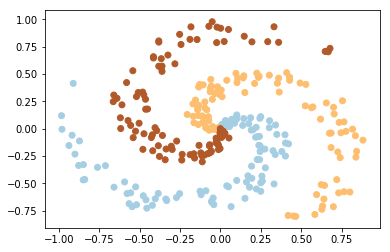

In [5]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=plt.cm.Paired)

## Create a Neural Network Model

In [6]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_layer, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_layer)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_layer, hidden_layer)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_layer, num_classes)
        
    def forward(self, X):
        out = self.fc1(X)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        
        return out
    
    def predict(self, X):
        y_score = self.forward(X)
        return torch.max(y_score, 1)[1]
    
    def plot_decision_boundary(self, X, y):
        x1_min, x2_min = X.min(0) - 0.5
        x1_max, x2_max = X.max(0) + 0.5
        x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
        xx = np.c_[x1.ravel(), x2.ravel()]
        #print(xx.shape)
        yy = self.predict(torch.from_numpy(xx.astype(np.float32)))
        #print(yy.shape)
        plt.pcolormesh(x1,x2,yy.reshape(x1.shape), cmap=plt.cm.Paired)
        plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k',cmap=plt.cm.Paired)
        plt.show()
        
        return 
        
    def plot_to_numpy(self, X, y):
        from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
        from matplotlib.figure import Figure

        x1_min, x2_min = X.min(0) - 0.5
        x1_max, x2_max = X.max(0) + 0.5
        x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
        xx = np.c_[x1.ravel(), x2.ravel()]
        yy = self.predict(torch.from_numpy(xx.astype(np.float32)))
        fig = Figure()
        canvas = FigureCanvas(fig)
        ax = fig.gca()
        ax.pcolormesh(x1,x2,yy.reshape(x1.shape), cmap=plt.cm.Paired)
        ax.scatter(X[:,0], X[:,1], c=y, edgecolors='k',cmap=plt.cm.Paired)
        ax.axis('off')
        canvas.draw()       # draw the canvas, cache the renderer
        width, height = fig.get_size_inches() * fig.get_dpi() 
        image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
        print(image.shape)
        image = image.reshape(int(height),int(width),3)

        return image

In [7]:
model = NeuralNet(2, 16, 3)

In [17]:
writer.add_graph(model, torch.from_numpy(x_train.astype(np.float32)))

In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [1]:
writer = SummaryWriter()

NameError: name 'SummaryWriter' is not defined

Loss is 1.1051833629608154, accuracy is: 0.2866666666666667 at epoch 0


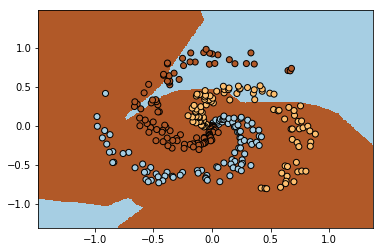

(373248,)
Loss is 0.9791631102561951, accuracy is: 0.6066666666666667 at epoch 1000


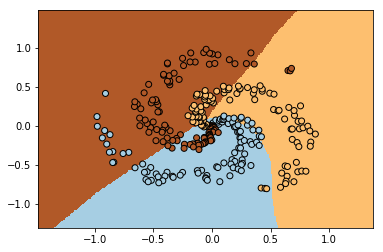

(373248,)
Loss is 0.7733417749404907, accuracy is: 0.5866666666666667 at epoch 2000


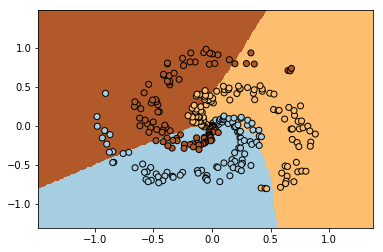

(373248,)
Loss is 0.670502245426178, accuracy is: 0.63 at epoch 3000


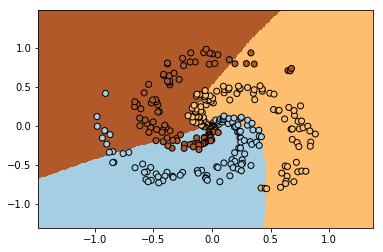

(373248,)
Loss is 0.5935986042022705, accuracy is: 0.6866666666666666 at epoch 4000


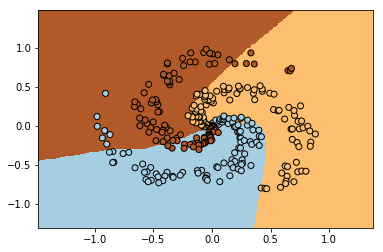

(373248,)
Loss is 0.519240140914917, accuracy is: 0.7366666666666667 at epoch 5000


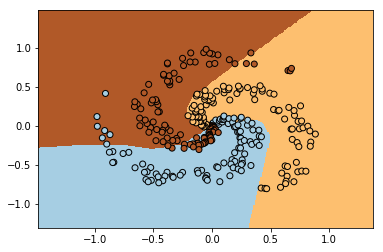

(373248,)
Loss is 0.44177672266960144, accuracy is: 0.7766666666666666 at epoch 6000


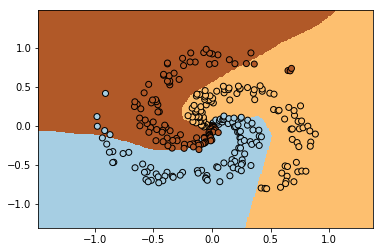

(373248,)
Loss is 0.36360228061676025, accuracy is: 0.8466666666666667 at epoch 7000


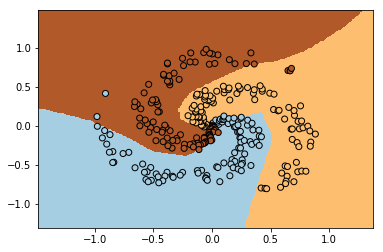

(373248,)
Loss is 0.28911876678466797, accuracy is: 0.8933333333333333 at epoch 8000


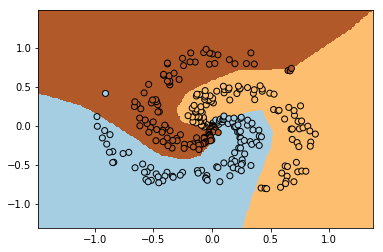

(373248,)
Loss is 0.22227683663368225, accuracy is: 0.93 at epoch 9000


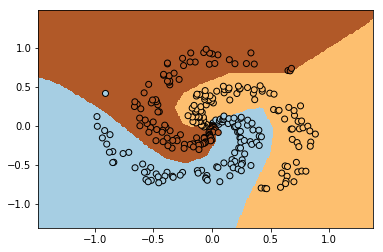

(373248,)
Loss is 0.17063622176647186, accuracy is: 0.95 at epoch 10000


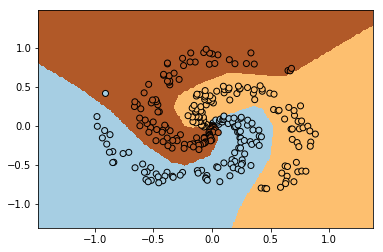

(373248,)


In [12]:

for epoch in range(10001):
    y_pred_score = model(torch.from_numpy(x_train.astype(np.float32)))
    loss = loss_fn(y_pred_score, torch.from_numpy(y_train.astype(np.int64)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%1000==0:
        y_pred = model.predict(torch.from_numpy(x_train.astype(np.float32))).detach().numpy()
        acc = (y_pred==y_train).sum()/len(y_train)
        print(f'Loss is {loss}, accuracy is: {acc} at epoch {epoch}')
        model.plot_decision_boundary(x_train, y_train)
        writer.add_scalar('data/loss', loss.item(), epoch)
        writer.add_scalar('data/accuracy', acc, epoch)
        writer.add_image(f'Decision Boundary {epoch}', model.plot_to_numpy(x_train, y_train),1)